In [259]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 

- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

- Problem Statements :-we have to predict the price of the flight ticket. 

we have to find out price and this problem is Regression problem and Price is our Traget variable 

In [260]:
# Test data set having [2671 rows × 10 columns]

test_df=pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [262]:
# Train data set has [10683 rows × 11 columns]
train_df=pd.read_excel('Data_Train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [263]:
print('Test data :-','\n',test_df.isnull().sum(),'\n')

print('Train data:-','\n',train_df.isnull().sum())

Test data :- 
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64 

Train data:- 
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Test data has no null values while we see Train data has some of null values.
- we see 1 null values in Route 
- One null value in total stop 

In [264]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [265]:
print(train_df.nunique())


Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64


we have to work into this casue all feature columns are in object so we need to convert into numeric data 


In [266]:
for d in train_df.columns:
    print(train_df[d].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

In [267]:
train_df["Journey_DAY"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.day

train_df["Journey_MONTH"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [268]:
train_df.drop("Date_of_Journey",axis=1,inplace=True)

In [269]:
train_df["Dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour

train_df["Dep_minutes"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop("Dep_Time",axis=1,inplace=True)

In [270]:
train_df["Arrival_hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df["Arrival_minutes"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

train_df.drop("Arrival_Time",axis=1,inplace=True)

In [271]:
train_df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [272]:
duration=list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

train_df["duration_hours"]=duration_hours
train_df["duration_minutes"]=duration_minutes
train_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [273]:
train_df.drop("Duration",axis=1,inplace=True)

In [274]:
train_df['total_time_travel']=np.round((train_df["duration_minutes"]/60)+ train_df["duration_hours"],2)

In [275]:
train_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,2.83


In [276]:
(50/60)+2

2.8333333333333335

In [277]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Route              10682 non-null  object 
 4   Total_Stops        10682 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  int64  
 7   Journey_DAY        10683 non-null  int64  
 8   Journey_MONTH      10683 non-null  int64  
 9   Dep_hour           10683 non-null  int64  
 10  Dep_minutes        10683 non-null  int64  
 11  Arrival_hour       10683 non-null  int64  
 12  Arrival_minutes    10683 non-null  int64  
 13  duration_hours     10683 non-null  int64  
 14  duration_minutes   10683 non-null  int64  
 15  total_time_travel  10683 non-null  float64
dtypes: float64(1), int64(9

In [278]:
train_df['Total_Stops']=train_df['Total_Stops'].fillna(train_df['Total_Stops'].mode()[0])

In [279]:
train_df['Total_Stops'].isnull().sum()

0

In [280]:
train_df.isnull().sum()


Airline              0
Source               0
Destination          0
Route                1
Total_Stops          0
Additional_Info      0
Price                0
Journey_DAY          0
Journey_MONTH        0
Dep_hour             0
Dep_minutes          0
Arrival_hour         0
Arrival_minutes      0
duration_hours       0
duration_minutes     0
total_time_travel    0
dtype: int64

In [281]:
# Dropping Features which are irrelevent.
train_df.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

In [282]:
train_df.shape

(10683, 14)

In [283]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Total_Stops        10683 non-null  object 
 4   Price              10683 non-null  int64  
 5   Journey_DAY        10683 non-null  int64  
 6   Journey_MONTH      10683 non-null  int64  
 7   Dep_hour           10683 non-null  int64  
 8   Dep_minutes        10683 non-null  int64  
 9   Arrival_hour       10683 non-null  int64  
 10  Arrival_minutes    10683 non-null  int64  
 11  duration_hours     10683 non-null  int64  
 12  duration_minutes   10683 non-null  int64  
 13  total_time_travel  10683 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 1.1+ MB


In [284]:
import warnings
warnings.filterwarnings('ignore')

# EDA


<AxesSubplot:xlabel='count', ylabel='Airline'>

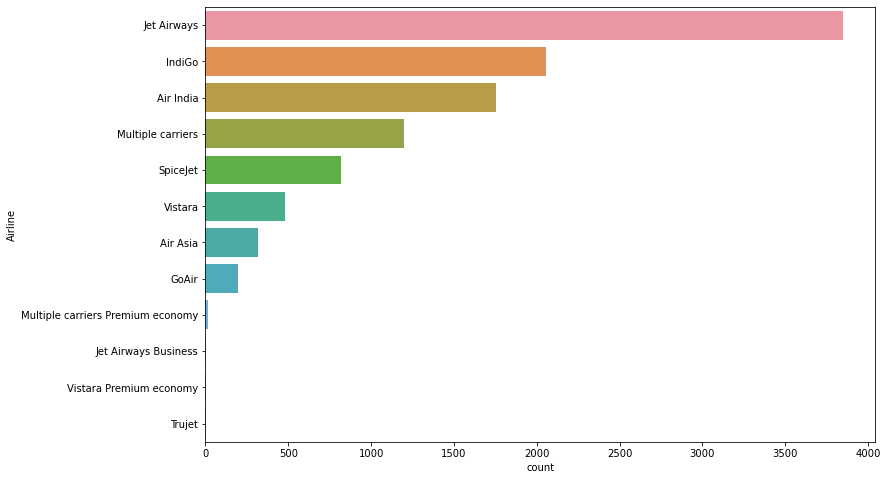

In [285]:
plt.figure(figsize=(12,8))
sb.countplot(y=train_df.iloc[:,0],order=train_df.iloc[:,0].value_counts().index)

# Price vs Airline

<Figure size 720x576 with 0 Axes>

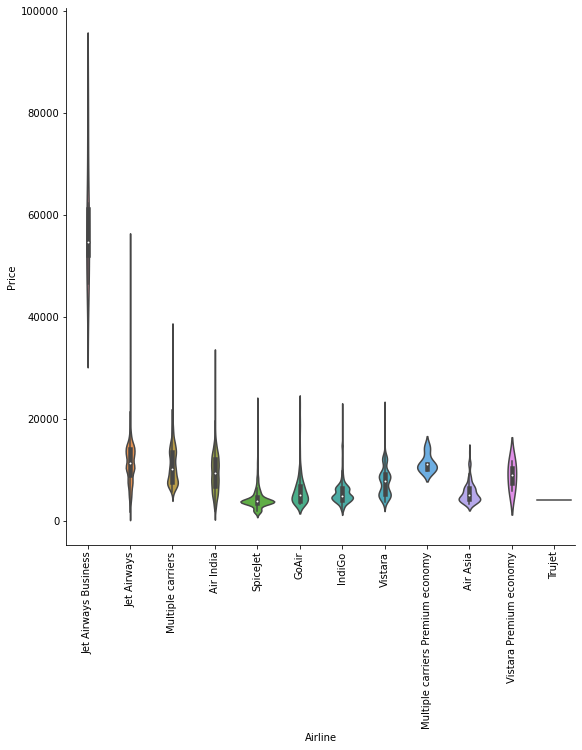

In [286]:
plt.figure(figsize=(10,8))
sb.catplot(y="Price",x="Airline",data=train_df.sort_values("Price",ascending=False),kind='violin',aspect=1,height=8)
plt.xticks(rotation=90)
plt.show()

jet airways business has highest price, as per the ploted graph 

# Price vs Source

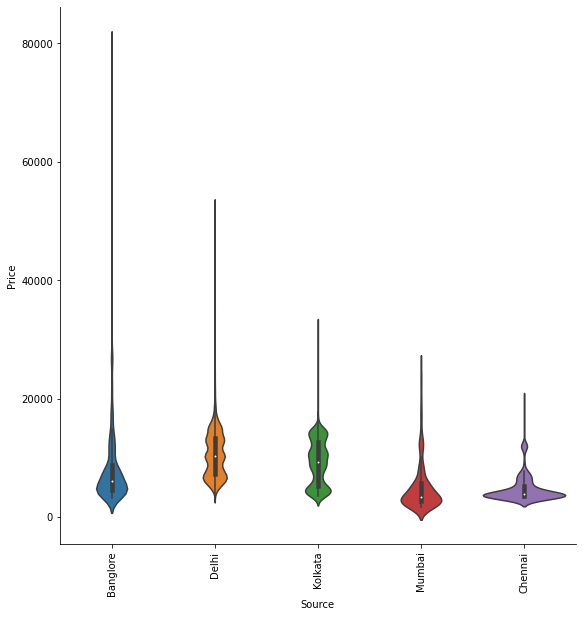

In [287]:
sb.catplot(y="Price",x="Source",data=train_df.sort_values("Price",ascending=False),kind="violin",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

from source bangelore has the highest price and lowest one is chennai

# Price vs Destination        

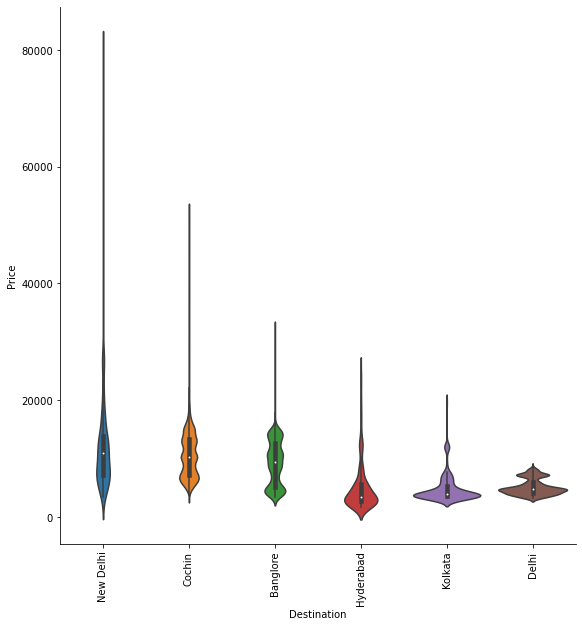

In [288]:
sb.catplot(y="Price",x="Destination",data=train_df.sort_values("Price",ascending=False),kind="violin",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

# Total_time_traval vs Destination 

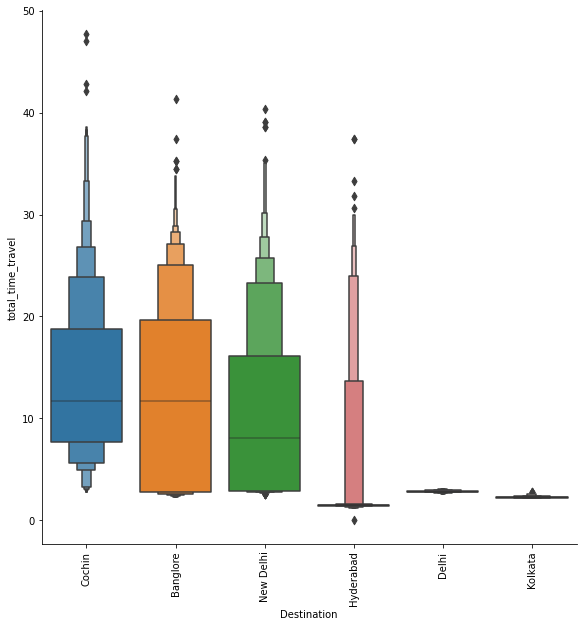

In [289]:
sb.catplot(y="total_time_travel",x="Destination",data=train_df.sort_values("total_time_travel",ascending=False),kind="boxen",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

# Total time traval vs Source 

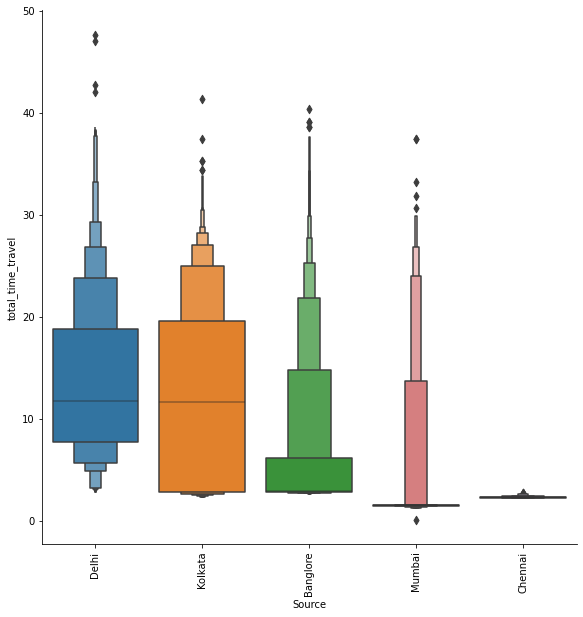

In [290]:
sb.catplot(y="total_time_travel",x="Source",data=train_df.sort_values("total_time_travel",ascending=False),kind="boxen",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

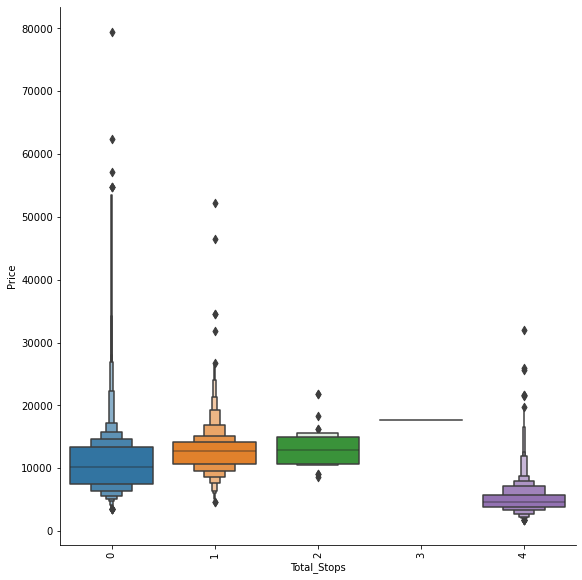

In [421]:
sb.catplot(y="Price",x="Total_Stops",data=train_df.sort_values("Price",ascending=False),kind="boxen",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

where the stop is 0 price is high .

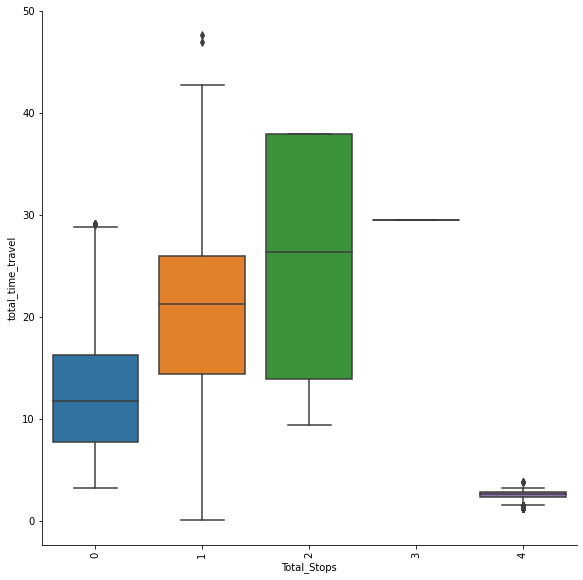

In [433]:
sb.catplot(y="total_time_travel",x="Total_Stops",data=train_df.sort_values('total_time_travel',ascending=False),kind="box",height=8,aspect=1)
plt.xticks(rotation=90)
plt.show()

In [291]:
train_df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,2.83


In [292]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Total_Stops        10683 non-null  object 
 4   Price              10683 non-null  int64  
 5   Journey_DAY        10683 non-null  int64  
 6   Journey_MONTH      10683 non-null  int64  
 7   Dep_hour           10683 non-null  int64  
 8   Dep_minutes        10683 non-null  int64  
 9   Arrival_hour       10683 non-null  int64  
 10  Arrival_minutes    10683 non-null  int64  
 11  duration_hours     10683 non-null  int64  
 12  duration_minutes   10683 non-null  int64  
 13  total_time_travel  10683 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 1.1+ MB


# Feature Engineering

## For train data:-

In [293]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [294]:
len(train_df['Airline'].unique())

12

In [295]:
airline=pd.get_dummies(train_df['Airline'])
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [296]:
len(train_df['Source'].value_counts())

5

In [297]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [298]:
train_df['Source']=le.fit_transform(train_df['Source'])


In [299]:
train_df['Destination']=le.fit_transform(train_df['Destination'])

In [300]:
train_df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [301]:
len(pd.DataFrame(le.fit_transform(train_df['Total_Stops'])).value_counts())

5

In [302]:
train_df['Total_Stops']=le.fit_transform(train_df['Total_Stops'])

In [303]:
len(train_df['Total_Stops'].value_counts())

5

In [304]:
train_df.sample()

,Airline,Source,Destination,Total_Stops,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
1075,Jet Airways,3,0,0,13941,12,5,6,30,12,0,5,30,5.5


In [305]:
df=pd.concat([airline,train_df],join='inner',axis=1)
df.sample()
pd.reset_option('max_columns')
df.sample()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
6682,0,0,0,0,1,0,0,0,0,0,...,14178,24,5,16,30,9,20,16,50,16.83


In [306]:
df.columns


Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Airline', 'Source', 'Destination',
       'Total_Stops', 'Price', 'Journey_DAY', 'Journey_MONTH', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'duration_hours',
       'duration_minutes', 'total_time_travel'],
      dtype='object')

In [307]:
df.drop('Airline',axis=1,inplace=True)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Air Asia                           10683 non-null  uint8  
 1   Air India                          10683 non-null  uint8  
 2   GoAir                              10683 non-null  uint8  
 3   IndiGo                             10683 non-null  uint8  
 4   Jet Airways                        10683 non-null  uint8  
 5   Jet Airways Business               10683 non-null  uint8  
 6   Multiple carriers                  10683 non-null  uint8  
 7   Multiple carriers Premium economy  10683 non-null  uint8  
 8   SpiceJet                           10683 non-null  uint8  
 9   Trujet                             10683 non-null  uint8  
 10  Vistara                            10683 non-null  uint8  
 11  Vistara Premium economy            10683 non-null  uin

## For test data:-

In [309]:
test_df.shape

(2671, 10)

In [310]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [311]:
test_df["Journey_DAY"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.day

test_df["Journey_MONTH"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [312]:
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [313]:
test_df["Dep_hour"]=pd.to_datetime(test_df["Dep_Time"]).dt.hour

test_df["Dep_minutes"]=pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop("Dep_Time",axis=1,inplace=True)

In [314]:
test_df["Arrival_hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arrival_minutes"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute

test_df.drop("Arrival_Time",axis=1,inplace=True)

In [315]:
test_df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


In [316]:
duration=list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours_test=[]
duration_minutes_test=[]

for  i in range(len(duration)):
    duration_hours_test.append(int(duration[i].split("h")[0]))
    duration_minutes_test.append(int(duration[i].split("m")[0].split()[-1]))
    

test_df["duration_hours"]=duration_hours_test
test_df["duration_minutes"]=duration_minutes_test
test_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55


In [317]:
test_df.drop("Duration",axis=1,inplace=True)

In [318]:
test_df['total_time_travel']=np.round((test_df["duration_minutes"]/60)+ test_df["duration_hours"],2)

In [319]:
test_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55,10.92


In [320]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            2671 non-null   object 
 1   Source             2671 non-null   object 
 2   Destination        2671 non-null   object 
 3   Route              2671 non-null   object 
 4   Total_Stops        2671 non-null   object 
 5   Additional_Info    2671 non-null   object 
 6   Journey_DAY        2671 non-null   int64  
 7   Journey_MONTH      2671 non-null   int64  
 8   Dep_hour           2671 non-null   int64  
 9   Dep_minutes        2671 non-null   int64  
 10  Arrival_hour       2671 non-null   int64  
 11  Arrival_minutes    2671 non-null   int64  
 12  duration_hours     2671 non-null   int64  
 13  duration_minutes   2671 non-null   int64  
 14  total_time_travel  2671 non-null   float64
dtypes: float64(1), int64(8), object(6)
memory usage: 313.1+ KB


In [321]:
test_df.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

In [322]:
test_df.shape

(2671, 13)

In [323]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55,10.92
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0,4.00
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45,23.75
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0,13.00
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50,2.83


In [324]:
airline_test=pd.get_dummies(test_df['Airline'])

In [325]:
airline_test

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0


In [326]:
test_df['Source']=le.fit_transform(test_df['Source'])

In [327]:
test_df['Destination']=le.fit_transform(test_df['Destination'])

In [328]:
test_df['Total_Stops']=le.fit_transform(test_df['Total_Stops'])

In [329]:
df_test=pd.concat([airline_test,test_df],axis=1)

In [330]:
df_test

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,...,Total_Stops,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
0,0,0,0,0,1,0,0,0,0,0,...,0,6,6,17,30,4,25,10,55,10.92
1,0,0,0,1,0,0,0,0,0,0,...,0,12,5,6,20,10,20,4,0,4.00
2,0,0,0,0,1,0,0,0,0,0,...,0,21,5,19,15,19,0,23,45,23.75
3,0,0,0,0,0,0,1,0,0,0,...,0,21,5,8,0,21,0,13,0,13.00
4,1,0,0,0,0,0,0,0,0,0,...,4,24,6,23,55,2,45,2,50,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,...,0,6,6,20,30,20,25,23,55,23.92
2667,0,0,0,1,0,0,0,0,0,0,...,4,27,3,14,20,16,55,2,35,2.58
2668,0,0,0,0,1,0,0,0,0,0,...,0,6,3,21,50,4,25,6,35,6.58
2669,0,1,0,0,0,0,0,0,0,0,...,0,6,3,4,0,19,15,15,15,15.25


In [331]:
df_test=df_test.drop('Airline',axis=1)

In [332]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Air Asia                           2671 non-null   uint8  
 1   Air India                          2671 non-null   uint8  
 2   GoAir                              2671 non-null   uint8  
 3   IndiGo                             2671 non-null   uint8  
 4   Jet Airways                        2671 non-null   uint8  
 5   Jet Airways Business               2671 non-null   uint8  
 6   Multiple carriers                  2671 non-null   uint8  
 7   Multiple carriers Premium economy  2671 non-null   uint8  
 8   SpiceJet                           2671 non-null   uint8  
 9   Vistara                            2671 non-null   uint8  
 10  Vistara Premium economy            2671 non-null   uint8  
 11  Source                             2671 non-null   int32

In [333]:
len(test_df['Airline'].unique()),len(train_df['Airline'].unique())

(11, 12)

We see there are mis match of columns if we see train and test data in air line.To match the data i will just drop there columns which is silent in test data

# Correlation

In [334]:
df.corr()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_time_travel
Air Asia,1.000000,-0.077705,-0.023860,-0.085570,-0.131664,-0.004159,-0.062292,-0.006124,-0.050520,-0.001697,...,-0.133044,0.008940,0.005647,0.045969,0.158184,-0.034981,0.078261,-0.104330,0.085799,-0.101858
Air India,-0.077705,1.000000,-0.060235,-0.216026,-0.332394,-0.010499,-0.157260,-0.015460,-0.127540,-0.004285,...,0.050346,-0.032668,-0.045917,-0.013004,-0.045442,0.088716,0.061220,0.261934,-0.033273,0.261772
GoAir,-0.023860,-0.060235,1.000000,-0.066332,-0.102063,-0.003224,-0.048288,-0.004747,-0.039162,-0.001316,...,-0.095146,-0.003111,-0.004497,-0.016365,0.076733,0.018534,0.096838,-0.094053,0.067205,-0.092136
IndiGo,-0.085570,-0.216026,-0.066332,1.000000,-0.366037,-0.011562,-0.173177,-0.017025,-0.140449,-0.004719,...,-0.361048,0.007322,-0.048515,-0.023367,-0.014763,-0.071459,0.035123,-0.346258,0.119781,-0.343553
Jet Airways,-0.131664,-0.332394,-0.102063,-0.366037,1.000000,-0.017790,-0.266463,-0.026195,-0.216105,-0.007261,...,0.416135,-0.017241,0.059716,0.113980,0.024376,-0.027332,-0.057698,0.307050,-0.084097,0.305388
Jet Airways Business,-0.004159,-0.010499,-0.003224,-0.011562,-0.017790,1.000000,-0.008417,-0.000827,-0.006826,-0.000229,...,0.253302,-0.031710,-0.034788,-0.007522,0.009165,-0.014454,0.005232,-0.011849,-0.002324,-0.011968
Multiple carriers,-0.062292,-0.157260,-0.048288,-0.173177,-0.266463,-0.008417,1.000000,-0.012393,-0.102242,-0.003435,...,0.139803,0.042190,0.053676,-0.149969,-0.109400,0.067949,-0.167455,-0.008119,-0.118786,-0.012107
Multiple carriers Premium economy,-0.006124,-0.015460,-0.004747,-0.017025,-0.026195,-0.000827,-0.012393,1.000000,-0.010051,-0.000338,...,0.017651,0.030841,-0.051223,-0.028669,-0.004628,0.013492,-0.001786,-0.002275,-0.006855,-0.002520
SpiceJet,-0.050520,-0.127540,-0.039162,-0.140449,-0.216105,-0.006826,-0.102242,-0.010051,1.000000,-0.002786,...,-0.296552,0.022177,-0.011984,-0.010434,0.092599,-0.090039,0.012542,-0.263855,0.041299,-0.263443
Trujet,-0.001697,-0.004285,-0.001316,-0.004719,-0.007261,-0.000229,-0.003435,-0.000338,-0.002786,1.000000,...,-0.010380,-0.008568,-0.014199,0.000857,-0.010008,0.003740,-0.002750,-0.008253,-0.007610,-0.008537


<AxesSubplot:>

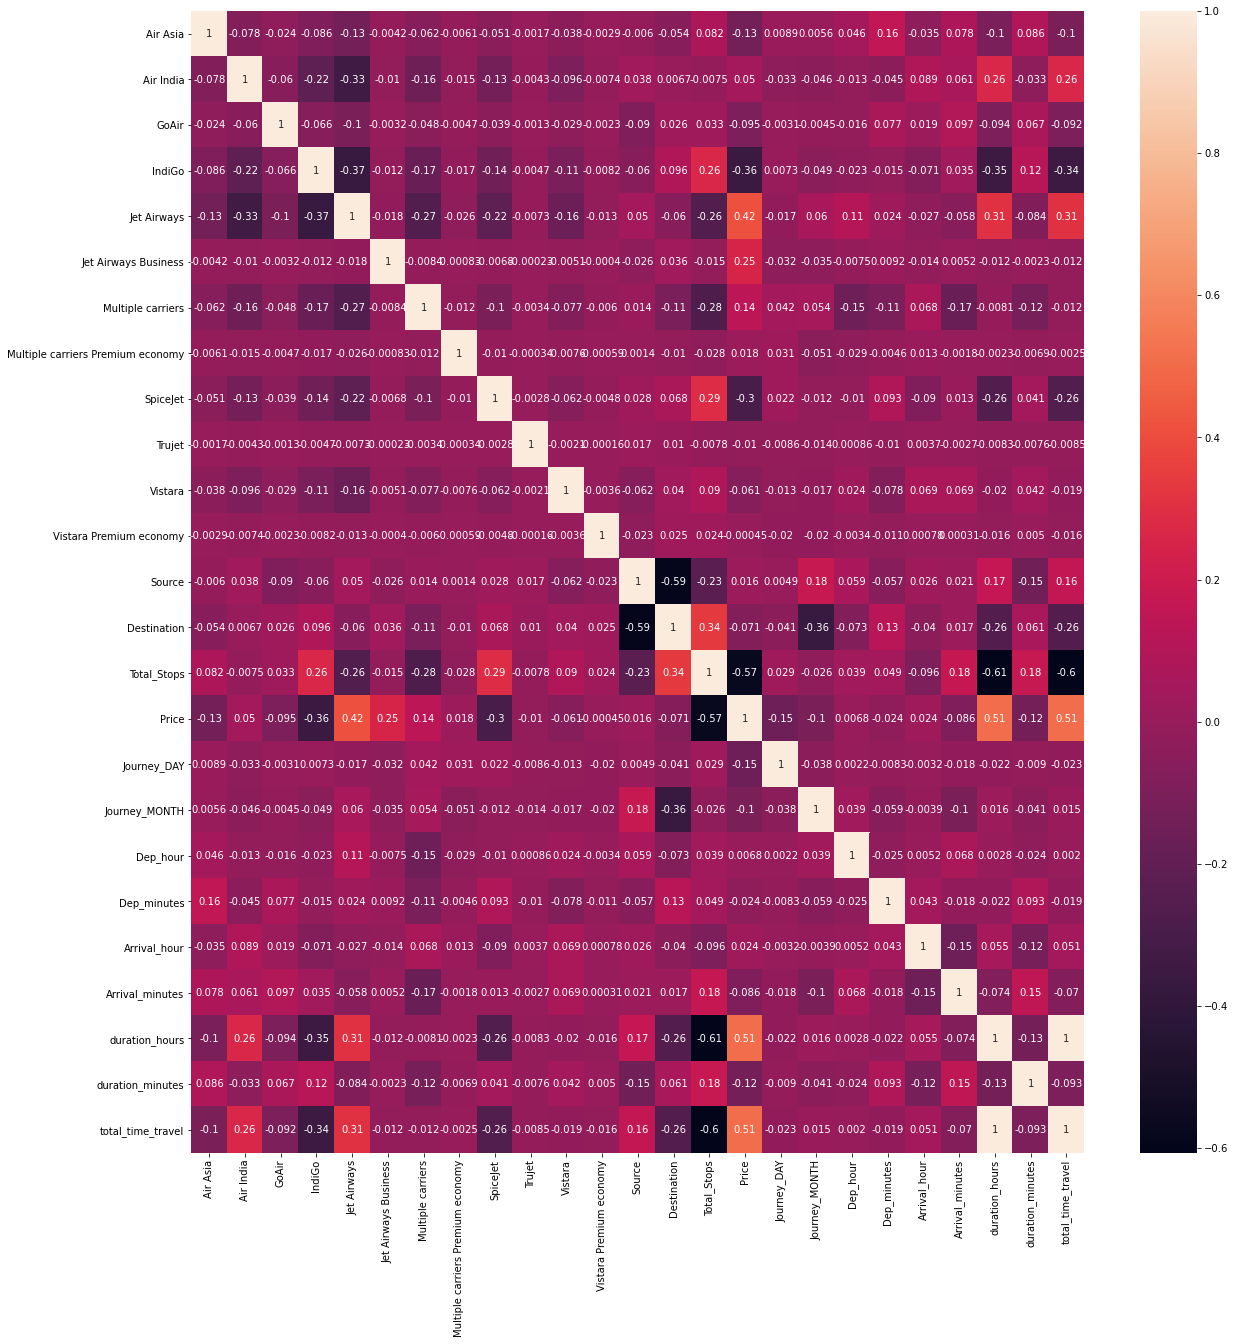

In [335]:
# For better view we plot heatmap graph here 
plt.figure(figsize=(20,21))
sb.heatmap(data=df.corr(),annot=True)

# Testing of multicollinierity 

In [336]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [337]:
X=df.drop(columns=['Price','Trujet'],axis=1)
Y=df['Price']
Y.astype('int')

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int32

In [338]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Air Asia                           10683 non-null  uint8  
 1   Air India                          10683 non-null  uint8  
 2   GoAir                              10683 non-null  uint8  
 3   IndiGo                             10683 non-null  uint8  
 4   Jet Airways                        10683 non-null  uint8  
 5   Jet Airways Business               10683 non-null  uint8  
 6   Multiple carriers                  10683 non-null  uint8  
 7   Multiple carriers Premium economy  10683 non-null  uint8  
 8   SpiceJet                           10683 non-null  uint8  
 9   Vistara                            10683 non-null  uint8  
 10  Vistara Premium economy            10683 non-null  uint8  
 11  Source                             10683 non-null  int

In [339]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = np.round([variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))])
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
22,total_time_travel,29609175.0
20,duration_hours,28121531.0
21,duration_minutes,48170.0
4,Jet Airways,25.0
15,Journey_MONTH,21.0
3,IndiGo,13.0
1,Air India,12.0
6,Multiple carriers,7.0
16,Dep_hour,6.0
11,Source,6.0


There are some of the columns behave as  multicolinearity

# Feature Selection:-

In [340]:
from sklearn.tree import DecisionTreeClassifier
select= DecisionTreeClassifier()
select.fit(X,Y)

DecisionTreeClassifier()

In [341]:
add=np.round(select.feature_importances_,3)
add

array([0.004, 0.01 , 0.002, 0.02 , 0.006, 0.   , 0.001, 0.   , 0.006,
       0.007, 0.   , 0.011, 0.024, 0.027, 0.3  , 0.138, 0.081, 0.065,
       0.064, 0.05 , 0.043, 0.05 , 0.091])

In [342]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.004482662028280763
1 0.010027119868369058
2 0.0015821903291227482
3 0.020094958905640017
4 0.0058067614811862745
5 0.0001470487227546271
6 0.0013269324806252413
7 0.00034538663094820974
8 0.006050023181492816
9 0.006655279592821084
10 0.0002205730841319407
11 0.010613053505741559
12 0.024180415295460587
13 0.026579666536337275
14 0.3002582118134589
15 0.13756582651946803
16 0.08101885655250803
17 0.0648024199360829
18 0.06415642377116816
19 0.05018419558005231
20 0.0428978078892059
21 0.049509467488175446
22 0.09149471880696822


In [343]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= X.columns
imp_feature['Values']=select.feature_importances_
imp_feature

,Feature,Values
0,Air Asia,0.004483
1,Air India,0.010027
2,GoAir,0.001582
3,IndiGo,0.020095
4,Jet Airways,0.005807
5,Jet Airways Business,0.000147
6,Multiple carriers,0.001327
7,Multiple carriers Premium economy,0.000345
8,SpiceJet,0.006050
9,Vistara,0.006655


In [344]:
0.004+ 0.009+ 0.002+ 0.019+ 0.006+ 0.   + 0.001+ 0.001+ 0.009+0.007+ 0.   + 0.011+ 0.026+ 0.029+ 0.3  + 0.139+ 0.083+ 0.061+0.063+ 0.053+ 0.037+ 0.053+ 0.089

1.002

Here we see almost all the columns shows 1.002 %, we may drop columns which is almost close to 0 or equal to zero. Although i am not dropping any columns.I am using all the columns for prediction,we do several operations to see the accuracy score or in this case we say r2_score.

In [345]:
imp_feature.sort_values('Values',ascending=False)

,Feature,Values
14,Journey_DAY,0.300258
15,Journey_MONTH,0.137566
22,total_time_travel,0.091495
16,Dep_hour,0.081019
17,Dep_minutes,0.064802
18,Arrival_hour,0.064156
19,Arrival_minutes,0.050184
21,duration_minutes,0.049509
20,duration_hours,0.042898
13,Total_Stops,0.026580


# Scaling Data:-

In [346]:
from sklearn.preprocessing import StandardScaler

In [347]:
scale= StandardScaler()
x_scaled=scale.fit_transform(X)

In [348]:
x_scaled

array([[-0.17544122, -0.44291155, -0.13599841, ..., -0.97069753,
         1.27900775, -0.93194169],
       [-0.17544122,  2.25778713, -0.13599841, ..., -0.38211718,
        -0.19638797, -0.3896491 ],
       [-0.17544122, -0.44291155, -0.13599841, ...,  1.03047566,
        -1.67178369,  0.97848775],
       ...,
       [-0.17544122, -0.44291155, -0.13599841, ..., -0.85298146,
        -1.67178369, -0.91185678],
       [-0.17544122, -0.44291155, -0.13599841, ..., -0.97069753,
         0.68884946, -0.95084514],
       [-0.17544122,  2.25778713, -0.13599841, ..., -0.26440111,
        -0.49146712, -0.28213576]])

# Training and Model Building

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

### Spliting training and testing data

In [351]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=0,test_size=0.25)

# Model Building

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor

In [352]:
lr_model=LinearRegression()
dt_model=DecisionTreeRegressor()
svc_model=SVR()
knn_model=KNeighborsRegressor()
rd_model=RandomForestRegressor()
xgb_model=XGBRegressor()
sdg_model=SGDRegressor()
bag_model=BaggingRegressor()
ada_model=AdaBoostRegressor()
gd_model=GradientBoostingRegressor()
et_model=ExtraTreeRegressor()
nl_model=MLPRegressor()

In [353]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model,nl_model]

In [355]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('R2 Score of ',m, 'is', r2_score(y_test,predict))
    print("mean squared Score", mean_squared_error(y_test,predict))
    print('mean absolute error ',m,' is \n', mean_absolute_error(y_test,predict))
    print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
    print('*******************************************')

R2 Score of  LinearRegression() is 0.5390556575666274
mean squared Score 9603791.272873608
mean absolute error  LinearRegression()  is 
 2155.8571584705815
RMSE 3098.998430601992
*******************************************
R2 Score of  DecisionTreeRegressor() is 0.7002108300406615
mean squared Score 6246117.6960289525
mean absolute error  DecisionTreeRegressor()  is 
 1367.7019343566703
RMSE 2499.2234185900534
*******************************************
R2 Score of  SVR() is 0.055871201211270316
mean squared Score 19670956.08638796
mean absolute error  SVR()  is 
 3406.517142878272
RMSE 4435.195157643907
*******************************************
R2 Score of  KNeighborsRegressor() is 0.7136853658824414
mean squared Score 5965375.277019843
mean absolute error  KNeighborsRegressor()  is 
 1449.0002995132909
RMSE 2442.4117746645106
*******************************************
R2 Score of  RandomForestRegressor() is 0.8135152009113119
mean squared Score 3885417.220996494
mean absolute erro

In [356]:
from sklearn.model_selection import cross_val_score

In [361]:
for i in models:
    print('\n','r2 score of ',i, 'is', r2_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=8).mean())
    print('@'*50)


 r2 score of  LinearRegression() is 0.5390556575666274
cross Validation accuracy score of  LinearRegression()  is  0.571077975622215
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  DecisionTreeRegressor() is 0.7002108300406615
cross Validation accuracy score of  DecisionTreeRegressor()  is  0.7074892313351482
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  SVR() is 0.055871201211270316
cross Validation accuracy score of  SVR()  is  0.026559977966083573
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  KNeighborsRegressor() is 0.7136853658824414
cross Validation accuracy score of  KNeighborsRegressor()  is  0.6152543844511243
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  RandomForestRegressor() is 0.8135152009113119
cross Validation accuracy score of  RandomForestRegressor()  is  0.8137799494096494
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  XGBRegressor(base_score=0.5, booster='gbtree', callb

RandomForestRegressor is sohowing the best r2_score so, i am selecting RandomForestRegressor model for prediction, but before that i am tuning the model for better performance 

# Hyperparameter tuning 

In [362]:
from sklearn.model_selection import RandomizedSearchCV

In [363]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [364]:
random_grid={
    "n_estimators":n_estimators,
     "max_features":max_features,
     "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [368]:
rf_random=RandomizedSearchCV(estimator=rd_model,param_distributions=random_grid,n_iter=10,cv=5)

In [370]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [385]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=700)

In [386]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [387]:
pred=rf_random.predict(x_test)

In [388]:
r2_score(y_test,pred)

0.7975439532192636

 ok, we not getting any increase in r2_score here.so, i am saving the earlier model which shows efficient r2_score

# Saving the model 

In [391]:
import pickle
import pickle
file_name='Flight ticket price'
with open(file_name,'wb') as file:
    pickle.dump(rd_model,file)

In [413]:
model=open("Flight ticket price",'rb')
forest=pickle.load(model)


# PREDICTION

In [416]:
df_test_prediction=np.round(forest.predict(df_test),0)

In [418]:
prediction_data=pd.Series(df_test_prediction)
prediction_data

0        9820.0
1        7738.0
2        9898.0
3        8994.0
4       11793.0
         ...   
2666    12953.0
2667     9502.0
2668     9820.0
2669    12111.0
2670    10094.0
Length: 2671, dtype: float64